# Date and Time

The date and time information is uniquitous in real-world datasets. It is important to understand how date and time are handled in Python and in the `pandas` package.

Some of the material discussed here was borrowed from [here](https://github.com/ResearchComputing/Meetup-Fall-2013). 

## The `datetime` type

In [1]:
from datetime import datetime, date, time
from datetime import timedelta

Note the not so typical way of import statements here. If you want to import specific things you will use it. 

The interpretation here is that you are importing specific subpackages like `datetime, date, time, timedelta` from the `datetime` package. 

In [2]:
now = datetime.now()
print(now)
print(now.year, now.month, now.day)
print(now.hour, now.minute, now.second)
print(now.microsecond)
print(now.hour, now.year)

2021-11-18 14:12:45.990405
2021 11 18
14 12 45
990405
14 2021


In [3]:
soon = datetime(2021,day=21, month=11)
print(soon)

2021-11-21 00:00:00


## datetime.timedelta

In [4]:
delta = datetime(2013,12,3) - datetime(2012,12,3)
print(type(delta))
print(delta.days)
print(delta.seconds)

<class 'datetime.timedelta'>
365
0


In [5]:
print(now)
print(now + timedelta(seconds=600)) #10 minutes

2021-11-18 14:12:45.990405
2021-11-18 14:22:45.990405


## Converting between strings with strftime, strptime, and dateutil.parser

Often times when you load the data from a file you might have to know how to convert a column that is in a string to a DateTime format, or you might want to know how to convert a time to a specific string format. 

### Converting datetime to a string

In [6]:
print(str(now))
print(str(soon))

2021-11-18 14:12:45.990405
2021-11-21 00:00:00


To string with more control... (string format time -> str**f**time)

[Documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) provides the meaning for various behaviors, like `%Y`, `%b`, `%A`, etc. 

In [8]:
print(now.strftime('%Y-%b-%d'))
print(now.strftime('%Y/%B/%d'))

2021-Nov-18
2021/November/18


In [9]:
now = datetime.now()
print(now.strftime('%a, %d %b %Y %H:%M:%S'))

Thu, 18 Nov 2021 14:15:47


### Converting string to a datetime

We will use the method str**p**time to parse the time


In [10]:
print(datetime.strptime('2021-12-4', '%Y-%m-%d'))


2021-12-04 00:00:00


In [11]:
date_list = ['2021-12-19 05:26:39', 
             '2021-12-19 07:00:39', 
             '2021-12-19 09:00:39']

[ datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in date_list ]

[datetime.datetime(2021, 12, 19, 5, 26, 39),
 datetime.datetime(2021, 12, 19, 7, 0, 39),
 datetime.datetime(2021, 12, 19, 9, 0, 39)]

In [12]:
date_list = ['2021-12-19 05:26:39', 
             '2021-12-19 07', 
             '2021-12-19 09:00']

[datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in date_list]

ValueError: time data '2021-12-19 07' does not match format '%Y-%m-%d %H:%M:%S'

**NOTE**: The above conversion failed because the second time is not formatted like the rest of them, it only has hour information but not the minute and second information. 

### `dateutil.parser` to the rescue

This parse is smart to figure out the format as much as possible. 

In [13]:
from dateutil.parser import parse

print(parse('2021-04-25'))
print(parse('2021/04/25'))

2021-04-25 00:00:00
2021-04-25 00:00:00


In [14]:
# It smartly parses the text to convert to date time. 

print(parse('April 4th, 2021 at 11:30am'))

2021-04-04 11:30:00


In [15]:
# It smartly parses the text to convert to date time. 

print(parse('April 4 2021 11:30'))

2021-04-04 11:30:00


In [16]:
# Though it is not super smart

print(parse('tomorrow at 11:30am'))

ParserError: Unknown string format: tomorrow at 11:30am

In [17]:
date_list = ['2021-12-19 05:26:39', 
             '2021-12-19 07', 
             '2021-12-19 09:00']

dates = [parse(x) for x in date_list]
for dt in dates:
    print(dt)

2021-12-19 05:26:39
2021-12-19 07:00:00
2021-12-19 09:00:00


# Time Series with pandas

`pandas` package has a lot of functionality in handling time based data sets. 

The pandas was developed by people working in finance industry, so it is no wonder they were able to build very efficient methods for handling time series in pandas. 

In [18]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

In [19]:
date = pd.to_datetime("4th July, 2021")
date.strftime('%A')

'Sunday'

In [20]:
date = pd.to_datetime("21st Nov, 2021 at 12:30:45 PM")
date + pd.to_timedelta(60, 'T')

Timestamp('2021-11-21 13:30:45')

The 'D' represented the day, you can use 'M' for the month. The following characters and the corresponding description

| Code      | Description |                         
|-----------|-------------|
|``D``      |Calendar Day |
|``W``      |Week |
|``Y``      |Year |
|``H``      |Hour |
|``T``      |Minute |
|``S``      |Seconds |


In [21]:
print(date + pd.to_timedelta(1, 'D'))
print(date + pd.to_timedelta(1, 'T'))
print(date + pd.to_timedelta(1, 'W'))

2021-11-22 12:30:45
2021-11-21 12:31:45
2021-11-28 12:30:45


## Working with Google stock price data

This data was extracted from [Yahoo-finance](https://finance.yahoo.com/quote/GOOG/chart?p=GOOG) data. 

In [22]:
goog = pd.read_csv("./data/Google_Stock_Price.csv")
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,231.494354,236.789917,229.065155,232.284210,232.284210,15513200
1,2007-01-04,232.984665,240.411362,232.661758,240.068588,240.068588,15877700
2,2007-01-05,239.691040,242.174881,237.510223,242.020889,242.020889,13833500
3,2007-01-08,242.269272,243.352234,239.542007,240.227554,240.227554,9570600
4,2007-01-09,241.156509,242.547470,239.045242,241.181351,241.181351,10832700


In [23]:
goog.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Note that the `Date` column is read as an `object` which is equivalent to a string. However, it'll be a lot more beneficial if we convert it to a datetime format. 

## `pd.to_datetime` 

`pd.to_datetime` is used to convert a column read as string to a datetime object. 

Oftentimes, the `to_datetime()` method is smart to figure out the format of the date, however, sometimes it might be necessary to provide the `format` parameter. [Look](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) here for more options. 

In [24]:
# Converting the date and replacing it with the same column 
goog['Date'] = pd.to_datetime(goog['Date'])
goog.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Now notice that the `Date` column is no more an object but as a `datetime64` data type. Though, it might not change it visually it has a lot more advantages as we will see later. 

In [25]:
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,231.494354,236.789917,229.065155,232.284210,232.284210,15513200
1,2007-01-04,232.984665,240.411362,232.661758,240.068588,240.068588,15877700
2,2007-01-05,239.691040,242.174881,237.510223,242.020889,242.020889,13833500
3,2007-01-08,242.269272,243.352234,239.542007,240.227554,240.227554,9570600
4,2007-01-09,241.156509,242.547470,239.045242,241.181351,241.181351,10832700


In [26]:
goog['Date'].max()

Timestamp('2015-12-31 00:00:00')

In [27]:
goog['Date'].min()

Timestamp('2007-01-03 00:00:00')

# Pandas Time Series

## Setting the index

You can use `set_index` method to set a specific column as an index. 

In here we are setting `Date` column as a index. 

In [28]:
goog.set_index('Date', inplace=True)
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,231.494354,236.789917,229.065155,232.284210,232.284210,15513200
2007-01-04,232.984665,240.411362,232.661758,240.068588,240.068588,15877700
2007-01-05,239.691040,242.174881,237.510223,242.020889,242.020889,13833500
2007-01-08,242.269272,243.352234,239.542007,240.227554,240.227554,9570600
2007-01-09,241.156509,242.547470,239.045242,241.181351,241.181351,10832700


## Indexing by Time

DateTime object as an index is very useful for selection, grouping and doing a lot of timeseries manipulations. 

### Selection based on the index

In [29]:
#Selecting the range of dates 
goog.loc['2007-09-11': '2007-09-20']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-11,256.824615,259.139557,256.198669,258.980591,258.980591,5442300
2007-09-12,258.583160,262.284088,257.823120,259.636322,259.636322,6010800
2007-09-13,260.336761,261.901581,259.919464,260.694427,260.694427,3806600
2007-09-14,259.909546,263.421692,259.422699,262.666595,262.666595,5565600
2007-09-17,261.563782,262.929901,260.341736,260.952759,260.952759,4423400
2007-09-18,261.558807,266.889130,260.441071,265.905548,265.905548,8486100
2007-09-19,267.892609,272.949738,267.688934,271.658112,271.658112,11125600
2007-09-20,271.732635,276.600983,271.250763,274.628815,274.628815,11121800


In [30]:
#The indexing is now smart to read your dates for indexing
goog.loc['Nov 7th 2015':'Nov 16th 2015']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-09,730.200012,734.710022,719.429993,724.890015,724.890015,2069800
2015-11-10,724.400024,730.590027,718.500000,728.320007,728.320007,1608000
2015-11-11,732.460022,741.000000,730.229980,735.400024,735.400024,1366400
2015-11-12,731.000000,737.799988,728.645020,731.229980,731.229980,1837200
2015-11-13,729.169983,731.150024,716.729980,717.000000,717.000000,2075500
2015-11-16,715.599976,729.489990,711.330017,728.960022,728.960022,1905900


In [31]:
#You can select the whole month or year
goog.loc['Dec 2015']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-01,747.109985,768.950012,746.700012,767.039978,767.039978,2134600
2015-12-02,768.900024,775.955017,758.960022,762.380005,762.380005,2230400
2015-12-03,766.010010,768.994995,745.630005,752.539978,752.539978,2590600
2015-12-04,753.099976,768.489990,750.000000,766.809998,766.809998,2757300
2015-12-07,767.770020,768.729980,755.090027,763.250000,763.250000,1812300
2015-12-08,757.890015,764.799988,754.200012,762.369995,762.369995,1829500
2015-12-09,759.169983,764.229980,737.000977,751.609985,751.609985,2700000
2015-12-10,752.849976,755.849976,743.830017,749.460022,749.460022,1984900
2015-12-11,741.159973,745.710022,736.750000,738.869995,738.869995,2224400


In [32]:
# You can do the average stock price in the month of Jan in 2014

goog.loc['Jan 2014']['Close'].mean()

564.5157471428572

Notice that there are three things happening in the above statement in computing the mean closing price in the month of January. 
* First we are selecting all the rows with index or dates in January of 2014
* Then we are selecing the 'Close' column which is the closing price of the stock 
* We are computing the mean. 

In [33]:
# You can also do a very smart indexing with pandas time series objects

# NOTICE HOW YOU CAN SPECIFY THE DATES IN ANY FORMAT YOU WANT

goog.loc['Nov 2011':'12/2011':4]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-11-01,288.175690,290.863220,286.511505,287.455383,287.455383,6290700
2011-11-07,294.742981,302.423035,294.201508,302.199493,302.199493,6758400
2011-11-11,298.707184,304.067322,297.365936,302.209412,302.209412,8005600
2011-11-17,303.053925,304.166687,296.461792,298.493591,298.493591,7032000
2011-11-23,285.816040,288.250214,283.212982,283.212982,283.212982,4681700
2011-11-30,297.043030,297.817993,294.131958,297.758362,297.758362,6838000
2011-12-06,309.482117,312.278931,308.115997,309.869598,309.869598,4683100
2011-12-12,308.930695,311.066803,308.140839,310.674377,310.674377,4396100
2011-12-16,310.142822,312.626678,308.727020,310.957520,310.957520,8976600


Notice that it is getting the rows from Nov 2011 to Dec 2011, and the last :4 is saying get every 4th day in the data. 

# Activity

We will work with dataset based on the Group Project 1, but now work with time series data based on departure time. 

In [34]:
flights = pd.read_csv("./data/flights_departures.csv")
flights.head()

,DEPARTURE_DATETIME,AIRLINE,DAY_OF_WEEK,DISTANCE,AIR_TIME,TAXI_IN,TAXI_OUT,DEPARTURE_DELAY
0,2015-01-01 06:26:00,OO,4,483,73.0,10.0,21.0,4.0
1,2015-01-01 06:55:00,NK,4,977,132.0,7.0,22.0,-5.0
2,2015-01-01 08:07:00,WN,4,220,55.0,3.0,10.0,-3.0
3,2015-01-01 08:43:00,UA,4,1120,138.0,3.0,14.0,3.0
4,2015-01-01 09:44:00,WN,4,1123,179.0,7.0,7.0,-1.0


In [35]:
flights.dtypes

DEPARTURE_DATETIME     object
AIRLINE                object
DAY_OF_WEEK             int64
DISTANCE                int64
AIR_TIME              float64
TAXI_IN               float64
TAXI_OUT              float64
DEPARTURE_DELAY       float64
dtype: object

#### Step 1

* Convert the 'DEPARTURE_DATETIME' to a datetime data type.
* Now look at the dtypes of the 'flights' DataFrame by typing flights.dtypes

In [36]:
flights['DEPARTURE_DATETIME'] = pd.to_datetime(flights['DEPARTURE_DATETIME'])

In [37]:
flights.dtypes

DEPARTURE_DATETIME    datetime64[ns]
AIRLINE                       object
DAY_OF_WEEK                    int64
DISTANCE                       int64
AIR_TIME                     float64
TAXI_IN                      float64
TAXI_OUT                     float64
DEPARTURE_DELAY              float64
dtype: object

#### Step 2

* Set the 'DEPARTURE_DATETIME' as an index for the flights DataFrame. 

In [38]:
flights.set_index('DEPARTURE_DATETIME', inplace=True)
flights.head()

,AIRLINE,DAY_OF_WEEK,DISTANCE,AIR_TIME,TAXI_IN,TAXI_OUT,DEPARTURE_DELAY
DEPARTURE_DATETIME,,,,,,,
2015-01-01 06:26:00,OO,4,483,73.0,10.0,21.0,4.0
2015-01-01 06:55:00,NK,4,977,132.0,7.0,22.0,-5.0
2015-01-01 08:07:00,WN,4,220,55.0,3.0,10.0,-3.0
2015-01-01 08:43:00,UA,4,1120,138.0,3.0,14.0,3.0
2015-01-01 09:44:00,WN,4,1123,179.0,7.0,7.0,-1.0


#### Step 3: Selecting and producing summary statistics by using DateTime index

Keep in mind that all these summary statistis are on the sample of the data and not on the actual datasets. 

* Select all the flights that are on Nov 15th 2015. 
* How many flights are in the dataset on July 4th 2015? 
* How many unique airlines were there are on the labor day of 2015? 
    * You might have to google the date for the labor day in 2015 as pandas is not smart to figure this out. 
* What is the median distance traveled by flights between July 15th 2015 and July 20th 2015? 

In [39]:
flights.loc['15th Nov 2015']

,AIRLINE,DAY_OF_WEEK,DISTANCE,AIR_TIME,TAXI_IN,TAXI_OUT,DEPARTURE_DELAY
DEPARTURE_DATETIME,,,,,,,
2015-11-15 05:53:00,WN,7,319,48.0,4.0,12.0,-7.0
2015-11-15 05:59:00,UA,7,1012,138.0,3.0,9.0,-1.0
2015-11-15 07:14:00,AA,7,1303,188.0,6.0,10.0,4.0
2015-11-15 07:29:00,B6,7,925,127.0,7.0,16.0,-6.0
2015-11-15 08:12:00,WN,7,971,133.0,7.0,8.0,2.0
2015-11-15 08:23:00,AA,7,468,70.0,23.0,19.0,-7.0
2015-11-15 08:29:00,WN,7,1166,153.0,5.0,9.0,-1.0
2015-11-15 08:41:00,WN,7,1670,226.0,8.0,6.0,-4.0
2015-11-15 08:54:00,WN,7,1670,212.0,3.0,29.0,-1.0


In [44]:
flights.loc['Jul 4th 2015']

,AIRLINE,DAY_OF_WEEK,DISTANCE,AIR_TIME,TAXI_IN,TAXI_OUT,DEPARTURE_DELAY
DEPARTURE_DATETIME,,,,,,,
2015-07-04 05:59:00,DL,6,547,81.0,4.0,17.0,-1.0
2015-07-04 06:06:00,OO,6,562,79.0,26.0,59.0,-4.0
2015-07-04 06:23:00,UA,6,2007,248.0,5.0,10.0,-3.0
2015-07-04 06:55:00,MQ,6,837,140.0,9.0,13.0,-5.0
2015-07-04 07:23:00,DL,6,1671,197.0,5.0,13.0,-7.0
2015-07-04 08:25:00,DL,6,2556,314.0,4.0,15.0,-5.0
2015-07-04 08:42:00,WN,6,397,62.0,5.0,6.0,-3.0
2015-07-04 10:00:00,OO,6,1250,151.0,10.0,26.0,15.0
2015-07-04 10:05:00,WN,6,634,89.0,4.0,12.0,-5.0


In [41]:
len(flights.loc['Jul 4th 2015'])

24

In [43]:
flights.loc['Jul 4th 2015'].shape[0]

24

In [49]:
len (flights.loc['Sept 7th 2015']['AIRLINE'].unique())

6

In [50]:
flights.loc['Sept 7th 2015']['AIRLINE'].nunique()

6

In [51]:
flights.loc['July 15th 2015' : 'July 20th 2015']['DISTANCE'].median()

594.0

# Plotting TimeSeries data

Once you have the timeseries as an index for a DataFrame or Series, it becomes really easy to plot using `matplotlib`

In [52]:
# Extract the OHLC (Open, High, Low, Close) columns of the dataset. 

goog_new = goog[['Open','High','Low','Close']]

In [53]:
goog_new.head()

,Open,High,Low,Close
Date,,,,
2007-01-03,231.494354,236.789917,229.065155,232.284210
2007-01-04,232.984665,240.411362,232.661758,240.068588
2007-01-05,239.691040,242.174881,237.510223,242.020889
2007-01-08,242.269272,243.352234,239.542007,240.227554
2007-01-09,241.156509,242.547470,239.045242,241.181351


### Plotting timeseries data

<AxesSubplot:xlabel='Date'>

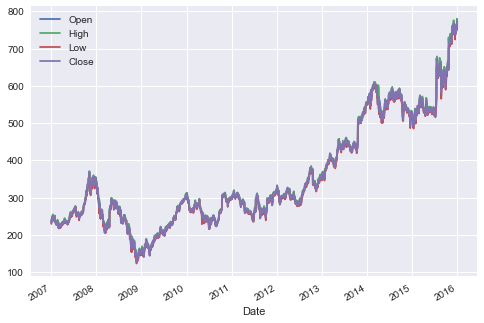

In [54]:
figure, axes = plt.subplots()

goog_new.plot(ax=axes)

The above plot is plotting the four lines for each of the Open, High, Low and Close price of Google for each day. 

### Plotting only slices of the dataset

For example let us see the price of Google in Nov 2008 (during the time of financial crisis)

<AxesSubplot:xlabel='Date'>

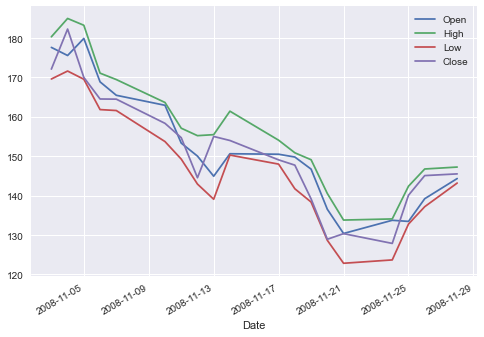

In [55]:
figure, axes = plt.subplots()

goog_new.loc['Nov 2008'].plot(ax = axes)

### Plotting the closing price of Google

Since all the four columns (Open, High, Low, Close) are on the same scale, it makes sense to plot all of them. However, not all times the columns of a DataFrame are on the same scale. So you can select the column you want to plot. 

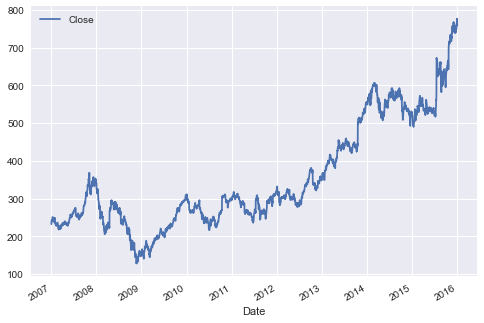

In [56]:
figure, axes = plt.subplots()

goog_new['Close'].plot(ax = axes)
axes.legend()

### Plotting a slice of closing price of Google

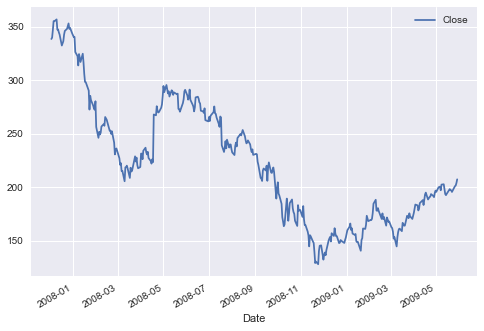

In [57]:
figure, axes = plt.subplots()

goog_new.loc['2007 Dec':'2009 May']['Close'].plot(ax = axes)
axes.legend()

Plot two columns if you think they both are on the same scale. 

In [58]:
goog_new.loc['2007 Dec':'2009 May'][['High', 'Low']]

,High,Low
Date,,
2007-12-03,345.254456,338.369232
2007-12-04,343.764160,336.372223
2007-12-05,347.206757,341.528687
2007-12-06,355.964783,346.252960
2007-12-07,356.680145,352.954376
...,...,...
2009-05-22,198.036957,194.733444
2009-05-26,201.191437,193.739914
2009-05-27,204.599274,201.097061


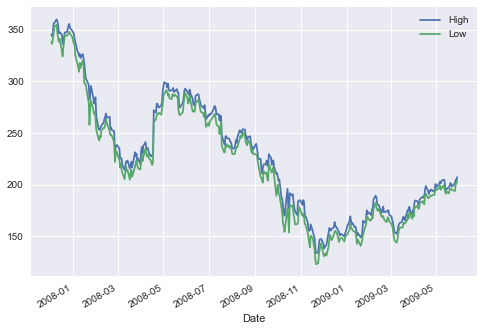

In [59]:
figure, axes = plt.subplots()

goog_new.loc['2007 Dec':'2009 May'][['High', 'Low']].plot(ax = axes)
axes.legend()

# Activity

We will use the flights DataFrame for this activity. 

In [60]:
flights.head()

,AIRLINE,DAY_OF_WEEK,DISTANCE,AIR_TIME,TAXI_IN,TAXI_OUT,DEPARTURE_DELAY
DEPARTURE_DATETIME,,,,,,,
2015-01-01 06:26:00,OO,4,483,73.0,10.0,21.0,4.0
2015-01-01 06:55:00,NK,4,977,132.0,7.0,22.0,-5.0
2015-01-01 08:07:00,WN,4,220,55.0,3.0,10.0,-3.0
2015-01-01 08:43:00,UA,4,1120,138.0,3.0,14.0,3.0
2015-01-01 09:44:00,WN,4,1123,179.0,7.0,7.0,-1.0


<AxesSubplot:xlabel='DEPARTURE_DATETIME'>

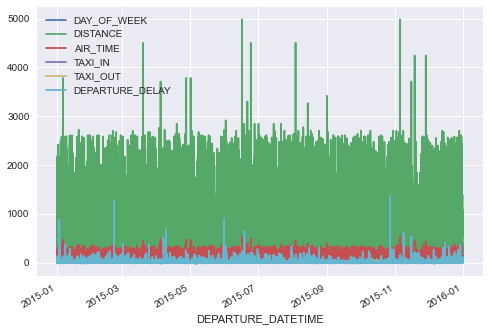

In [61]:
figure, axes = plt.subplots()

flights.plot(ax = axes)

This does not make sense as all of the columns here are not on the same scale. 

### Plotting Activity

Plot the following details from the dataset
* Plot the 'DEPARTURE_DELAY' for the flights on 15th August 2015
* Plot the 'TAXI_IN' and 'TAXI_OUT' for the flights on July 4th 2015

<AxesSubplot:xlabel='DEPARTURE_DATETIME'>

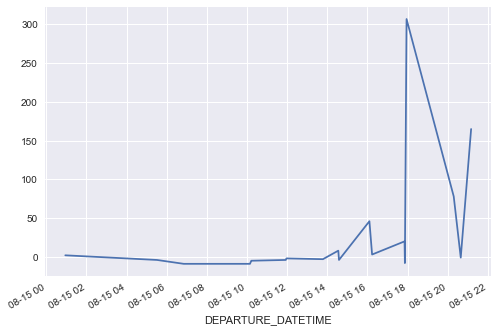

In [63]:
figure, axes = plt.subplots()

flights.loc['15th Aug 2015']['DEPARTURE_DELAY'].plot(ax = axes)

<AxesSubplot:xlabel='DEPARTURE_DATETIME'>

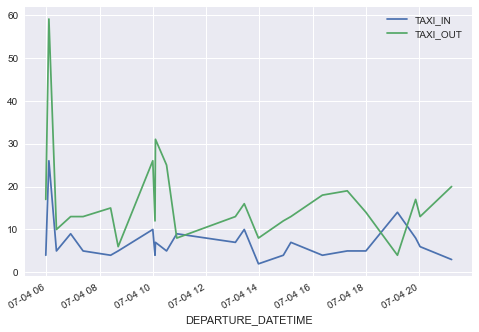

In [65]:
figure, axes = plt.subplots()

flights.loc['July 4th 2015'][['TAXI_IN', 'TAXI_OUT']].plot(ax = axes)

# Time Series Operations: Resampling and Windowing

Resampling and windowing techniques are very similar to the groupby operations that we have learned earlier, however, they are much more simple and easy to achieve with DateTime as an index to a DataFrame or Series in `pandas`.  

## `resample()` and `asfreq()` methods

`resample()` method needs to be provided with a frequency for resampling a given frequency. For example, if you provide the frequencey as 'M' for month, it is similar to the groupby month operation for each unique month in the dataset and then you can apply aggregate operations. 

`asfreq()` method just provides the the value at the end of that frequency. For example, if the frequency is 'M' for month, then it provides the value all the columns on the last day of each month. 

The notation used in frequency specification is given by the table along with description. 


| Code      | Description |                         
|-----------|-------------|
|``D``      |Calendar Day |
|``W``      |Weekly  |
|``M``      |Month end |
|``Q``      |Quarter end |
|``A``      |Year end |
|``H``      |Hours |
|``T``      |Minutes |
|``S``      |Seconds |
|``B``      |Business day|
|``BM``      |Business Month end|
|``BQ``      |Business Quarter end|
|``BA``      |Business Year end|
|``BH``      |Business Hours|

In [66]:
# Average Google price for the whole year (from the beginning to the end of each year)
goog.resample('A').mean()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-31,267.672969,270.330110,264.775876,267.634514,267.634514,1.094867e+07
2008-12-31,231.630031,235.638054,226.860794,230.924069,230.924069,1.272535e+07
2009-12-31,218.066943,220.559305,215.831285,218.423533,218.423533,7.063864e+06
2010-12-31,266.423166,268.726281,263.678991,266.080947,266.080947,6.401081e+06
2011-12-31,282.746857,285.327061,279.983146,282.648726,282.648726,6.196377e+06
2012-12-31,319.318381,322.043677,316.419556,319.331297,319.331297,5.242528e+06
2013-12-31,438.955119,442.193265,436.020338,439.264377,439.264377,4.201848e+06
2014-12-31,559.174432,562.949628,553.642231,558.270558,558.270558,2.493866e+06
2015-12-31,601.602355,606.983919,595.639702,601.550547,601.550547,2.067935e+06


In [68]:
# Average Google price for the whole year (from the beginning to the end of each year)
goog.resample('BQ').mean()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-30,233.634775,235.834649,231.166646,233.341438,233.341438,1.176833e+07
2007-06-29,241.744904,243.878647,239.925074,241.852695,241.852695,1.027547e+07
2007-09-28,261.234334,263.547465,259.174399,261.602416,261.602416,8.778694e+06
2007-12-31,331.976594,335.923423,326.786133,331.636927,331.636927,1.296619e+07
2008-03-31,259.364722,263.487416,253.967531,258.406283,258.406283,1.585945e+07
2008-06-30,270.007533,273.474670,266.154003,269.525201,269.525201,1.073999e+07
2008-09-30,237.665077,241.357002,233.124375,236.735188,236.735188,9.655381e+06
2008-12-31,160.782856,165.538566,155.467895,160.317834,160.317834,1.479350e+07
2009-03-31,164.545609,168.032683,161.435183,164.894651,164.894651,1.106954e+07


You can think of the above resample() and mean() as groupby the year and then compute the mean for each year. However, this is much more simpler and easy to achieve as you can specify any frequency you want. 

In [69]:
# asfreq gives you the exact price on the very last day of each year. 
goog.asfreq('A')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-31,347.027924,348.975250,343.058746,343.505829,343.505829,4783200.0
2008-12-31,151.117126,154.495163,150.327271,152.830978,152.830978,5811000.0
2009-12-31,310.356445,310.679321,307.986847,307.986847,307.986847,2455400.0
2010-12-31,296.441925,297.276489,294.102142,295.065887,295.065887,3098500.0
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-31,347.738312,352.989136,345.751221,351.404449,351.404449,4020600.0
2013-12-31,552.526367,556.878052,549.555664,556.734009,556.734009,2733400.0
2014-12-31,528.344849,529.687500,522.924683,523.521423,523.521423,1372000.0
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900.0


Notice that there is no price for 31st Dec 2011, because it was a Saturday, not a working day. You can get the last business day of the year by using 'BA'. 

In [70]:
goog.asfreq('BA')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-31,347.027924,348.975250,343.058746,343.505829,343.505829,4783200
2008-12-31,151.117126,154.495163,150.327271,152.830978,152.830978,5811000
2009-12-31,310.356445,310.679321,307.986847,307.986847,307.986847,2455400
2010-12-31,296.441925,297.276489,294.102142,295.065887,295.065887,3098500
2011-12-30,318.935638,321.290314,318.935638,320.863098,320.863098,3587600
2012-12-31,347.738312,352.989136,345.751221,351.404449,351.404449,4020600
2013-12-31,552.526367,556.878052,549.555664,556.734009,556.734009,2733400
2014-12-31,528.344849,529.687500,522.924683,523.521423,523.521423,1372000
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900


In [71]:
goog.resample('BM').median().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-31,244.268768,246.988571,241.529091,243.220589,243.220589,11977850
2007-02-28,232.721375,235.120773,230.853516,233.451630,233.451630,11354500
2007-03-30,224.211716,227.264359,222.920113,225.898247,225.898247,10629050
2007-04-30,234.753158,236.804810,233.275269,234.537064,234.537064,7522000
2007-05-31,234.015457,235.272286,231.581284,233.868912,233.868912,7890750


**NOTE:** You can also sepcifiy a number for the resampling. For example, you can resample every 5 days using 5D. 

In [72]:
goog.resample('5D').mean().head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,234.723353,239.792053,233.079045,238.124562,238.124562,1.507480e+07
2007-01-08,244.088440,246.240448,242.584222,244.734244,244.734244,1.118670e+07
2007-01-13,251.101821,253.543450,247.808243,248.771973,248.771973,1.436070e+07
2007-01-18,244.244756,245.054489,240.547139,241.499283,241.499283,1.094707e+07
2007-01-23,243.065345,246.731503,240.097149,243.671402,243.671402,1.136830e+07
2007-01-28,247.700199,249.348232,243.262810,244.663700,244.663700,1.853012e+07
2007-02-02,236.496816,237.836441,233.690074,235.160507,235.160507,1.262500e+07
2007-02-07,234.064306,235.266490,231.068787,232.310710,232.310710,8.759967e+06
2007-02-12,229.371164,231.551977,227.945431,229.977222,229.977222,1.036098e+07


### Plotting by resampling the data

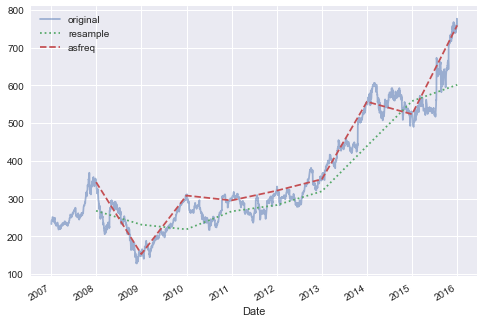

In [73]:
goog_close = goog['Close']

figure, axes = plt.subplots()

goog_close.plot(alpha = 0.5, style = '-', label='original')
goog_close.resample('BA').mean().plot(style=':', label='resample')
goog_close.asfreq('BA').plot(style='--',label='asfreq')
axes.legend()

# Rolling Window using `rolling()` method

A lot of times you may not want to compute the average at the end of the year or end of the month, but compute the rolling average (or any summary statistic) as the data moves along. You can do that by using `rolling()` method. 

In [74]:
goog.rolling(7).mean().head(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-11,239.319885,242.815722,237.681965,241.025223,241.025223,1.316463e+07
2007-01-12,241.873986,244.826926,240.441870,243.680099,243.680099,1.223496e+07
2007-01-16,244.609763,246.888517,242.922167,245.171825,245.171825,1.214331e+07


**NOTE**: Since in this case, each row is a day it might seem like it is last 7 days, but the parameter means 7 observations (that is, sever business days). 

In [75]:
goog.rolling(7).median().head(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-11,240.649811,242.547470,239.045242,241.181351,241.181351,13833500.0
2007-01-12,241.156509,243.352234,239.462524,242.020889,242.020889,12014600.0
2007-01-16,242.269272,245.180344,239.542007,243.148560,243.148560,12014600.0


### Plotting the rolling window averages

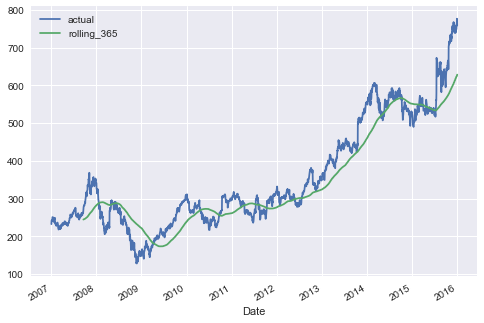

In [77]:
goog_close = goog['Close']

figure, axes = plt.subplots()
goog_close.plot(ax = axes, label = 'actual')
goog_close.rolling(180).mean().plot(ax = axes, label = 'rolling_365')
axes.legend()

# Activity

Again we will use flights data for this activity. 

In [78]:
flights.head()

,AIRLINE,DAY_OF_WEEK,DISTANCE,AIR_TIME,TAXI_IN,TAXI_OUT,DEPARTURE_DELAY
DEPARTURE_DATETIME,,,,,,,
2015-01-01 06:26:00,OO,4,483,73.0,10.0,21.0,4.0
2015-01-01 06:55:00,NK,4,977,132.0,7.0,22.0,-5.0
2015-01-01 08:07:00,WN,4,220,55.0,3.0,10.0,-3.0
2015-01-01 08:43:00,UA,4,1120,138.0,3.0,14.0,3.0
2015-01-01 09:44:00,WN,4,1123,179.0,7.0,7.0,-1.0


### Activity on `resampling()`, `rolling()`

* Compute the average DISTANCE travelled by flights in each month
* Compute the median AIR_TIME of the flights in 45 days
* Compute rolling average of DEPARTURE_DELAY for the last 30 obeservations

In [79]:
flights.resample('M')['DISTANCE'].mean()

DEPARTURE_DATETIME
2015-01-31    821.488722
2015-02-28    799.875661
2015-03-31    817.983173
2015-04-30    826.317343
2015-05-31    794.016110
2015-06-30    833.608222
2015-07-31    846.955069
2015-08-31    849.698070
2015-09-30    809.508095
2015-10-31    790.760282
2015-11-30    845.048724
2015-12-31    841.916667
Freq: M, Name: DISTANCE, dtype: float64

In [80]:
flights['AIR_TIME'].resample('45D').median()

DEPARTURE_DATETIME
2015-01-01    100.0
2015-02-15     94.0
2015-04-01     96.0
2015-05-16     93.0
2015-06-30     96.0
2015-08-14     92.0
2015-09-28     92.0
2015-11-12     97.0
2015-12-27    101.5
Freq: 45D, Name: AIR_TIME, dtype: float64

In [81]:
flights.rolling(30)['DEPARTURE_DELAY'].mean()

DEPARTURE_DATETIME
2015-01-01 06:26:00          NaN
2015-01-01 06:55:00          NaN
2015-01-01 08:07:00          NaN
2015-01-01 08:43:00          NaN
2015-01-01 09:44:00          NaN
                         ...    
2015-12-31 15:31:00    11.533333
2015-12-31 19:21:00    12.366667
2015-12-31 19:29:00    11.900000
2015-12-31 22:23:00    16.200000
2015-12-31 23:34:00    14.600000
Name: DEPARTURE_DELAY, Length: 10000, dtype: float64

### Activity on plotting the resampling and rolling data

Plot the following details
* Plot the average AIR_TIME at the each of the 15 days in the dataset
* Plot the rolling average DISTANCE of previous 500 observations in the dataset

<AxesSubplot:xlabel='DEPARTURE_DATETIME'>

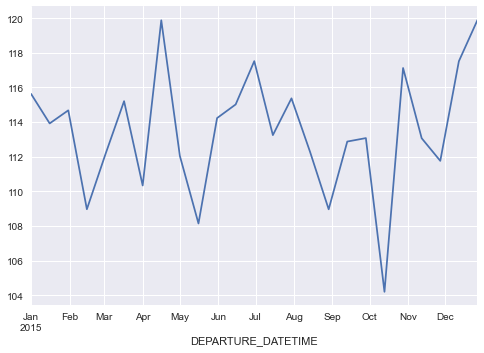

In [84]:
figure, axes = plt.subplots()

flights.resample('15D')['AIR_TIME'].mean().plot(ax = axes)

<AxesSubplot:xlabel='DEPARTURE_DATETIME'>

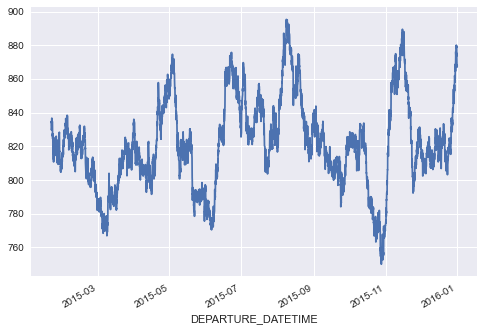

In [85]:
figure, axes = plt.subplots()

flights.rolling(500)['DISTANCE'].mean().plot(ax=axes)